In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
combats = pd.read_csv('combats.csv')
pokemon = pd.read_csv('pokemon.csv')

In [ ]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


# Preparación de datos

In [ ]:
pokemon['Name'] = pokemon['Name'].fillna('Primeape')

In [ ]:
names = dict(zip(pokemon['#'], pokemon['Name']))
combats_names = combats[['First_pokemon', 'Second_pokemon', 'Winner']].replace(names)
combats_names.head()

,First_pokemon,Second_pokemon,Winner
0,Larvitar,Nuzleaf,Nuzleaf
1,Virizion,Terrakion,Terrakion
2,Togetic,Beheeyem,Beheeyem
3,Slugma,Druddigon,Druddigon
4,Omastar,Shuckle,Omastar


In [ ]:
combats_names = combats_names.rename(columns = {'First_pokemon': 'Name_1', 'Second_pokemon': 'Name_2'})

In [ ]:
dic = {}
for col in pokemon:
  dic[col] = col + '_1'
pokemon_1 = pokemon.rename(columns = dic)
pokemon_1.columns

Index(['#_1', 'Name_1', 'Type 1_1', 'Type 2_1', 'HP_1', 'Attack_1',
       'Defense_1', 'Sp. Atk_1', 'Sp. Def_1', 'Speed_1', 'Generation_1',
       'Legendary_1'],
      dtype='object')

In [ ]:
df = pd.merge(combats_names, pokemon_1, on='Name_1', how='left')

In [ ]:
dic = {}
for col in pokemon:
  dic[col] = col + '_2'
pokemon_2 = pokemon.rename(columns = dic)
pokemon_2.columns

Index(['#_2', 'Name_2', 'Type 1_2', 'Type 2_2', 'HP_2', 'Attack_2',
       'Defense_2', 'Sp. Atk_2', 'Sp. Def_2', 'Speed_2', 'Generation_2',
       'Legendary_2'],
      dtype='object')

In [ ]:
df = pd.merge(df, pokemon_2, on='Name_2', how='left')

In [ ]:
df.Winner[df.Winner == df.Name_1] = 0
df.Winner[df.Winner == df.Name_2] = 1

<ipython-input-122-c5ad9cc85f87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Winner[df.Winner == df.Name_1] = 0
<ipython-input-122-c5ad9cc85f87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Winner[df.Winner == df.Name_2] = 1


In [ ]:
#lista = ['Rock', 'Grass', 'Fairy', 'Fire', 'Bug', 'Psychic', 'Fighting',
#       'Water', 'Normal', 'Ground', 'Electric', 'Dark', 'Ice', 'Steel',
#       'Ghost', 'Dragon', 'Flying', 'Poison']
#
#values = [n for n in range(1, len(lista)+1)]

#dictionary = dict(zip(lista, values))

#for l in lista:
#  df.loc[df['Type 1_1'] == l, 'Type 1_1'] = dictionary[l]
#  df.loc[df['Type 1_2'] == l, 'Type 1_2'] = dictionary[l]
#  df.loc[df['Type 2_1'] == l, 'Type 2_1'] = dictionary[l]
#  df.loc[df['Type 2_2'] == l, 'Type 2_2'] = dictionary[l]

#df.loc[df['Type 2_2'].isna(), 'Type 2_2'] = 0
#df.loc[df['Type 2_1'].isna(), 'Type 2_1'] = 0

In [ ]:
#df['Type 1_1'] = df['Type 1_1'].astype('category')
#df['Type 2_1'] = df['Type 2_1'].astype('category')
#df['Type 1_2'] = df['Type 1_2'].astype('category')
#df['Type 2_2'] = df['Type 2_2'].astype('category')

In [ ]:
df['Type 2_1'].fillna('Ninguno', inplace=True)
df['Type 2_2'].fillna('Ninguno', inplace=True)

In [ ]:
df['Type 1_1'] = df['Type 1_1'].apply(lambda x: x + '_1_1')
df['Type 1_2'] = df['Type 1_2'].apply(lambda x: x + '_1_2')
df['Type 2_1'] = df['Type 2_1'].apply(lambda x: x + '_2_1')
df['Type 2_2'] = df['Type 2_2'].apply(lambda x: x + '_2_2')

In [ ]:
one_hot = pd.get_dummies(df['Type 1_1'])
df = pd.concat([df, one_hot], axis=1)

In [ ]:
one_hot = pd.get_dummies(df['Type 1_2'])
df = pd.concat([df, one_hot], axis=1)

In [ ]:
one_hot = pd.get_dummies(df['Type 2_1'])
df = pd.concat([df, one_hot], axis=1)

In [ ]:
one_hot = pd.get_dummies(df['Type 2_2'])
df = pd.concat([df, one_hot], axis=1)

In [ ]:
df['Winner'] = df['Winner'].astype(int)

In [ ]:
df = df.drop(['#_1', '#_2','Generation_1','Generation_2','Legendary_1','Legendary_2', 'Type 1_1', 'Type 1_2', 'Type 2_1', 'Type 2_2'], axis=1)

In [ ]:
df.head()

,Name_1,Name_2,Winner,HP_1,Attack_1,Defense_1,Sp. Atk_1,Sp. Def_1,Speed_1,HP_2,Attack_2,Defense_2,Sp. Atk_2,Sp. Def_2,Speed_2,Bug_1_1,Dark_1_1,Dragon_1_1,Electric_1_1,Fairy_1_1,Fighting_1_1,Fire_1_1,Flying_1_1,Ghost_1_1,Grass_1_1,Ground_1_1,Ice_1_1,Normal_1_1,Poison_1_1,Psychic_1_1,Rock_1_1,Steel_1_1,Water_1_1,Bug_1_2,Dark_1_2,Dragon_1_2,Electric_1_2,Fairy_1_2,Fighting_1_2,Fire_1_2,Flying_1_2,Ghost_1_2,Grass_1_2,Ground_1_2,Ice_1_2,Normal_1_2,Poison_1_2,Psychic_1_2,Rock_1_2,Steel_1_2,Water_1_2,Bug_2_1,Dark_2_1,Dragon_2_1,Electric_2_1,Fairy_2_1,Fighting_2_1,Fire_2_1,Flying_2_1,Ghost_2_1,Grass_2_1,Ground_2_1,Ice_2_1,Ninguno_2_1,Normal_2_1,Poison_2_1,Psychic_2_1,Rock_2_1,Steel_2_1,Water_2_1,Bug_2_2,Dark_2_2,Dragon_2_2,Electric_2_2,Fairy_2_2,Fighting_2_2,Fire_2_2,Flying_2_2,Ghost_2_2,Grass_2_2,Ground_2_2,Ice_2_2,Ninguno_2_2,Normal_2_2,Poison_2_2,Psychic_2_2,Rock_2_2,Steel_2_2,Water_2_2
0,Larvitar,Nuzleaf,1,50,64,50,45,50,41,70,70,40,60,40,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Virizion,Terrakion,1,91,90,72,90,129,108,91,129,90,72,90,108,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Togetic,Beheeyem,1,55,40,85,80,105,40,75,75,75,125,95,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Slugma,Druddigon,1,40,40,40,70,40,20,77,120,90,60,90,48,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Omastar,Shuckle,0,70,60,125,115,70,55,20,10,230,10,230,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 89 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name_1        50000 non-null  object
 1   Name_2        50000 non-null  object
 2   Winner        50000 non-null  int64 
 3   HP_1          50000 non-null  int64 
 4   Attack_1      50000 non-null  int64 
 5   Defense_1     50000 non-null  int64 
 6   Sp. Atk_1     50000 non-null  int64 
 7   Sp. Def_1     50000 non-null  int64 
 8   Speed_1       50000 non-null  int64 
 9   HP_2          50000 non-null  int64 
 10  Attack_2      50000 non-null  int64 
 11  Defense_2     50000 non-null  int64 
 12  Sp. Atk_2     50000 non-null  int64 
 13  Sp. Def_2     50000 non-null  int64 
 14  Speed_2       50000 non-null  int64 
 15  Bug_1_1       50000 non-null  uint8 
 16  Dark_1_1      50000 non-null  uint8 
 17  Dragon_1_1    50000 non-null  uint8 
 18  Electric_1_1  50000 non-null  uint8 
 19  Fair

# Un poco de EDA


In [ ]:
colores = {'Grass': '#7AC74C',
           'Fire': '#EE8130',
           'Water': '#6390F0',
           'Bug': "#A6B91A",
           'Normal': "#A8A77A",
           'Poison': "#A33EA1",
           'Electric':"#F7D02C",
           'Ground':"#E2BF65",
           'Fairy': "#D685AD",
           'Fighting': '#C22E28',
           'Psychic': "#F95587",
           'Rock': "#B6A136",
           'Ghost': "#735797",
           'Ice': "#96D9D6",
           'Dragon': "#6F35FC",
           'Dark': "#705746",
           'Steel': "#B7B7CE",
           'Flying': "#A98FF3"}

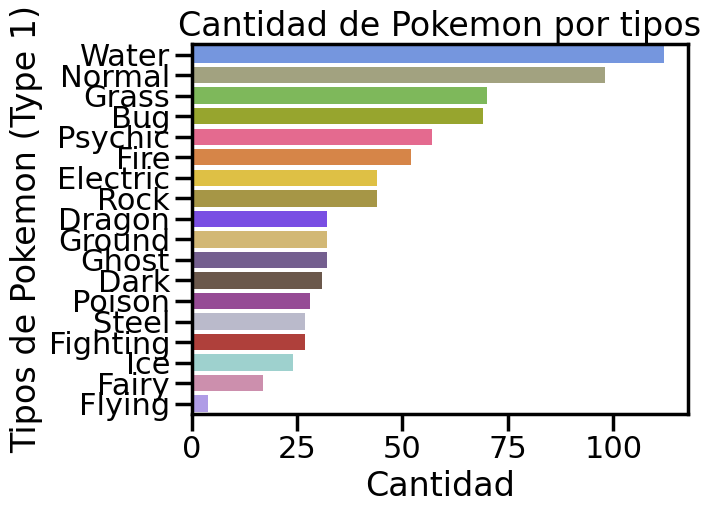

In [ ]:
import seaborn as sns

# Distribucion de tipos 1 de pokemon

sns.countplot(y= 'Type 1', data= pokemon, order= pokemon['Type 1'].value_counts(ascending=False).index, palette= colores)
plt.xlabel("Cantidad")
plt.ylabel("Tipos de Pokemon (Type 1)")
plt.title("Cantidad de Pokemon por tipos")
plt.show()

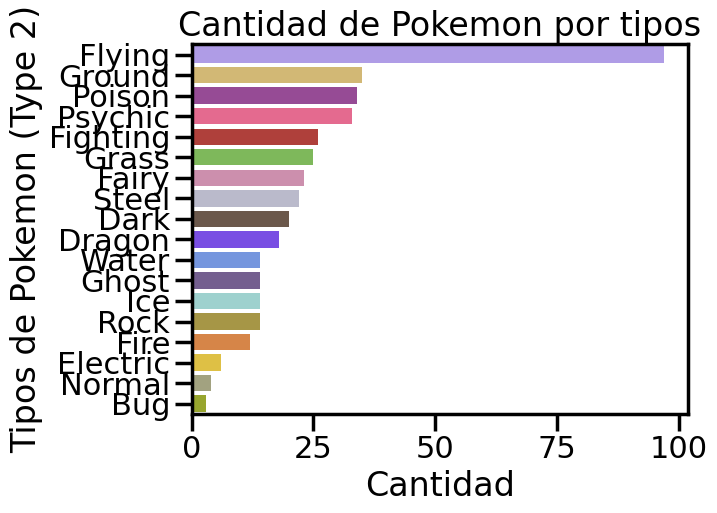

In [ ]:
# Distribucion de tipos 2 de pokemon

sns.countplot(y= 'Type 2', data= pokemon, order= pokemon['Type 2'].value_counts(ascending=False).index,palette= colores )
plt.xlabel("Cantidad")
plt.ylabel("Tipos de Pokemon (Type 2)")
plt.title("Cantidad de Pokemon por tipos")
plt.show()

In [ ]:
#Distribucion de tipos t1+t2

t1 = pokemon.value_counts("Type 1")
t2 = pokemon.value_counts("Type 2")

In [ ]:
t1_2 = t1.add(t2, fill_value=0)
t1_2_df = t1_2.reset_index().rename(columns={'index': 'Type', 0: 'Count'})
types = t1_2_df.sort_values(by='Count', ascending=False)

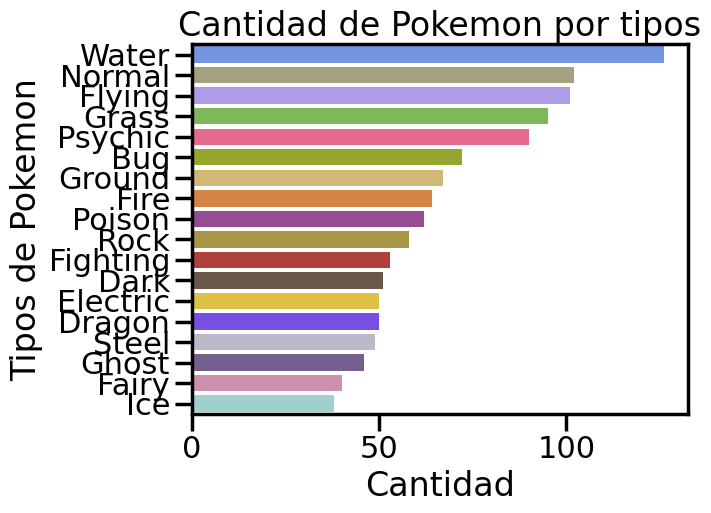

In [ ]:
sns.barplot(x = 'Count', y= 'Type', data= types, palette= colores)
sns.set_context("poster")
plt.xlabel("Cantidad")
plt.ylabel("Tipos de Pokemon")
plt.title("Cantidad de Pokemon por tipos")
plt.show()

Diferenciacion de Legendarios y pokemones comunes

In [ ]:
pokemon.value_counts("Legendary")

Legendary
False    735
True      65
dtype: int64

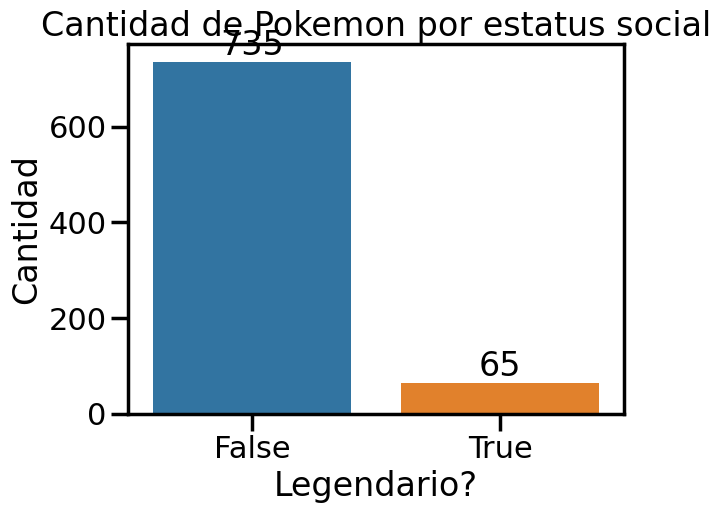

In [ ]:
# Graficamos
ax = sns.countplot(x='Legendary',  data=pokemon)

# Ponemos numeritos arriba de c/barrita
for label in ax.containers:
    ax.bar_label(label)

plt.ylabel("Cantidad")
plt.xlabel("Legendario?")
plt.title("Cantidad de Pokemon por estatus social")
plt.show()

Promedio de total points por tipo de pokemon

In [ ]:
tp = pokemon.copy()
tp['Total_points'] = tp['HP'] + tp['Attack'] + tp['Defense'] + tp['Sp. Atk'] + tp['Sp. Def'] + tp['Speed']

agregados = tp.groupby('Type 1')['Total_points'].median().sort_values(ascending=False)
order = list(agregados.index)

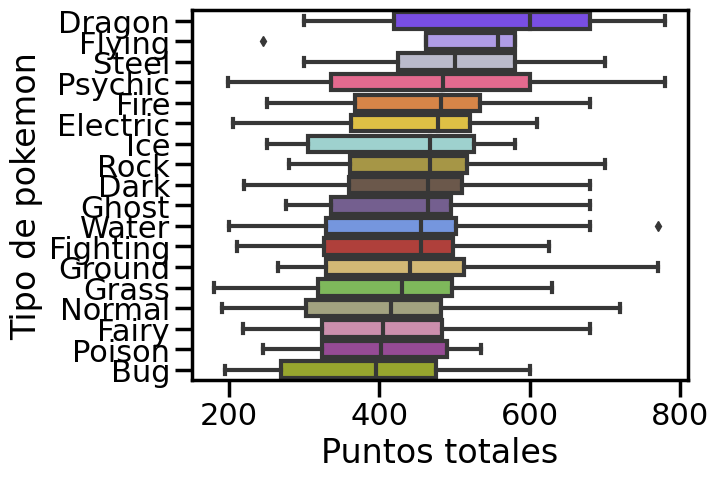

In [ ]:
sns.boxplot(y= tp["Type 1"], x= tp["Total_points"], order=order, palette= colores)
sns.set_context("poster")
plt.ylabel("Tipo de pokemon")
plt.xlabel("Puntos totales")
plt.show()

Veamos la distribucion de victorias segun tipo

Vemos las ventajas y desventajas de cada tipo de pokémon reflejadas en un graficop

In [ ]:
str_weak = pd.read_csv("https://raw.githubusercontent.com/zonination/pokemon-chart/master/chart.csv")
str_weak = str_weak.set_index("Attacking")
str_weak

,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
Attacking,,,,,,,,,,,,,,,,,,
Normal,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,1.0,1.0,0.5,1.0
Fire,1,0.5,0.5,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0,0.5,1.0,2.0,1.0
Water,1,2.0,0.5,1.0,0.5,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0
Electric,1,1.0,2.0,0.5,0.5,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0
Grass,1,0.5,2.0,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,0.5,2.0,1.0,0.5,1.0,0.5,1.0
Ice,1,0.5,0.5,1.0,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0
Fighting,2,1.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0,0.5,0.5,0.5,2.0,0.0,1.0,2.0,2.0,0.5
Poison,1,1.0,1.0,1.0,2.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,0.5,0.5,1.0,1.0,0.0,2.0
Ground,1,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,0.0,1.0,0.5,2.0,1.0,1.0,1.0,2.0,1.0


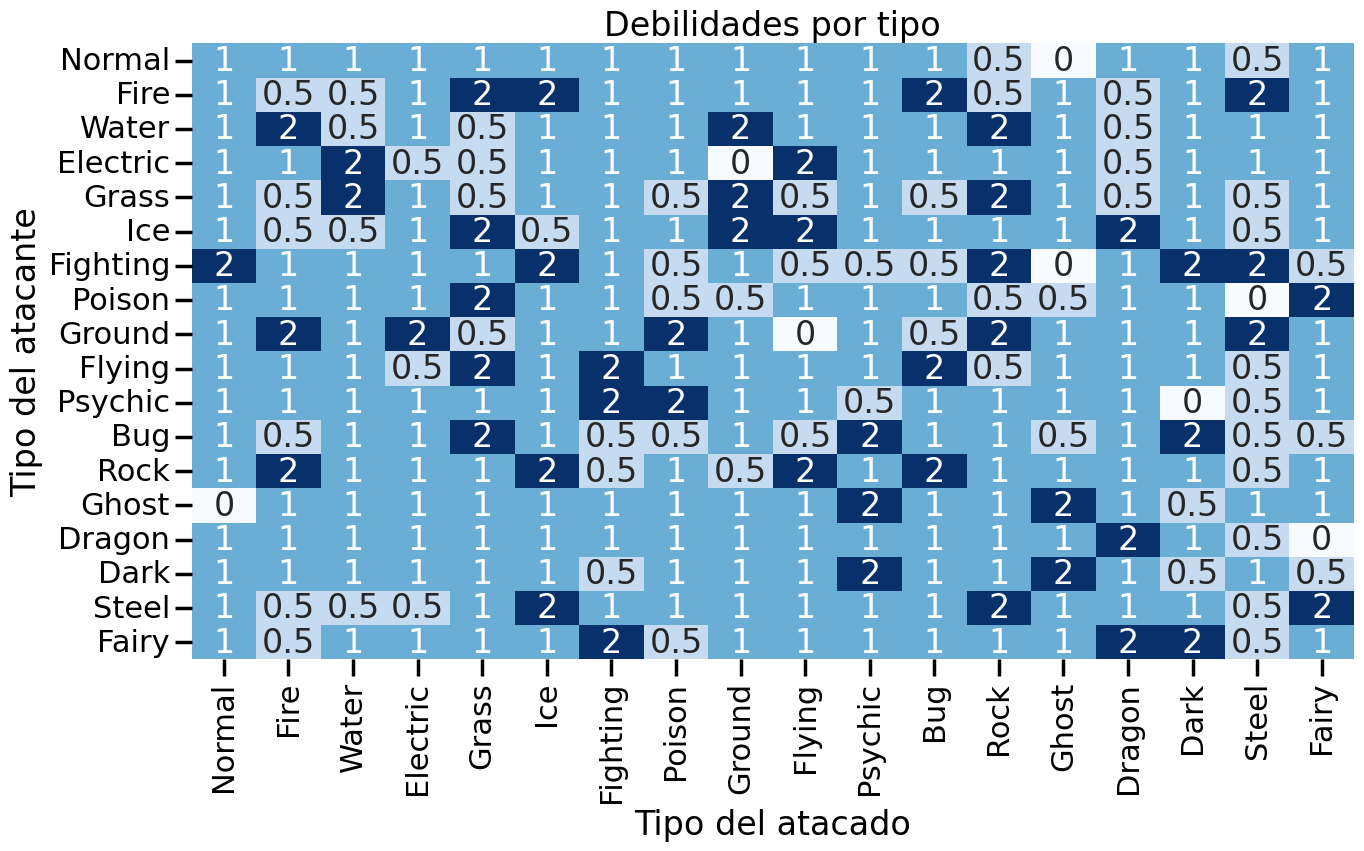

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(str_weak, annot=True, cmap="Blues", cbar = False)
sns.set_context("poster")
plt.xlabel('Tipo del atacado')
plt.ylabel('Tipo del atacante')
plt.title("Debilidades por tipo")
plt.show()

# Arbol

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import graphviz


In [ ]:
X = df.drop(['Name_1', 'Name_2', 'Winner'], axis=1)
y = df.Winner

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state= 2117)

In [ ]:
hiperparametros = {
    'max_depth': [6, 7, 8],
    'min_samples_split': [20, 25, 30, 35, 40],
    'min_samples_leaf': [25, 26, 27, 28, 30]
}

In [ ]:
clf = DecisionTreeClassifier()

search = GridSearchCV(clf, hiperparametros, cv=5)

search.fit(X_train, y_train)

In [ ]:
results = pd.DataFrame(search.cv_results_).sort_values('mean_test_score', ascending=False)
results[['param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'mean_test_score',
       'std_test_score', 'rank_test_score']].haed(10)

In [ ]:
search.best_params_

In [ ]:
clf = DecisionTreeClassifier(max_depth= 8, min_samples_leaf=25, min_samples_split=30)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=25, min_samples_split=30)

In [ ]:
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores)
print(scores.mean())

[0.94171429 0.94057143 0.93614286 0.94385714 0.93542857]
0.9395428571428571


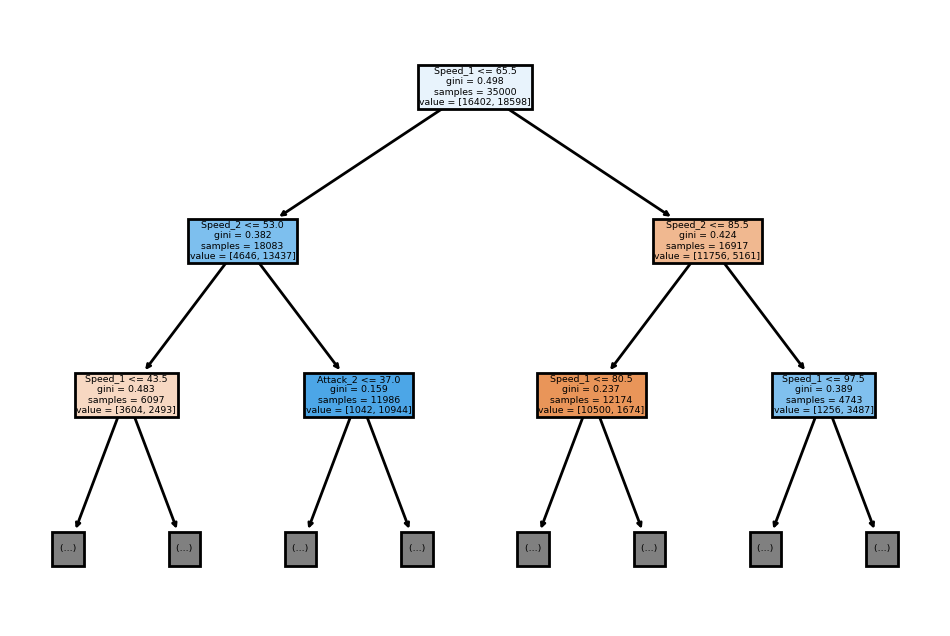

In [ ]:
plt.figure(figsize = (12,8))
tree.plot_tree(clf, filled = True, feature_names= X.columns, max_depth=2)
plt.show()

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True,
                                feature_names=df.drop(["Name_1", "Name_2", "Winner"], axis =1).columns,
                                class_names="Winner",
                                special_characters=True, max_depth=2)
graph = graphviz.Source(dot_data)

# Mostrar el gráfico del árbol
graph.render("tree")  # Guardar el gráfico como archivo PDF o imagen
graph.view()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy_score(y_pred, y_test)

0.9418666666666666

# Funcion Pelea

In [ ]:
def pelea_arbol(pok1, pok2):
  """Funcion que predice la probabilidad que gane el pokemon 1 o 2"""


  p1 = df.loc[df.Name_1 == pok1].iloc[1]
  p1 = p1[['Name_1', 'HP_1', 'Attack_1', 'Defense_1',
       'Sp. Atk_1', 'Sp. Def_1', 'Speed_1', 'Bug_1_1', 'Dark_1_1',
       'Dragon_1_1', 'Electric_1_1', 'Fairy_1_1', 'Fighting_1_1', 'Fire_1_1',
       'Flying_1_1', 'Ghost_1_1', 'Grass_1_1', 'Ground_1_1', 'Ice_1_1',
       'Normal_1_1', 'Poison_1_1', 'Psychic_1_1', 'Rock_1_1', 'Steel_1_1',
       'Water_1_1', 'Bug_2_1', 'Dark_2_1', 'Dragon_2_1', 'Electric_2_1',
       'Fairy_2_1', 'Fighting_2_1', 'Fire_2_1', 'Flying_2_1', 'Ghost_2_1',
       'Grass_2_1', 'Ground_2_1','Ice_2_1', 'Ninguno_2_1', 'Normal_2_1', 'Poison_2_1', 'Psychic_2_1',
       'Rock_2_1', 'Steel_2_1', 'Water_2_1']]
  p2 = df.loc[df.Name_2 == pok2].iloc[1]
  p2 = p2[['Name_2', 'HP_2', 'Attack_2', 'Defense_2',
       'Sp. Atk_2', 'Sp. Def_2', 'Speed_2', 'Bug_1_2', 'Dark_1_2', 'Dragon_1_2', 'Electric_1_2',
       'Fairy_1_2', 'Fighting_1_2', 'Fire_1_2', 'Flying_1_2', 'Ghost_1_2',
       'Grass_1_2', 'Ground_1_2', 'Ice_1_2', 'Normal_1_2', 'Poison_1_2',
       'Psychic_1_2', 'Rock_1_2', 'Steel_1_2', 'Water_1_2', 'Bug_2_2', 'Dark_2_2',
       'Dragon_2_2', 'Electric_2_2', 'Fairy_2_2', 'Fighting_2_2', 'Fire_2_2',
       'Flying_2_2', 'Ghost_2_2', 'Grass_2_2', 'Ground_2_2', 'Ice_2_2',
       'Ninguno_2_2', 'Normal_2_2', 'Poison_2_2', 'Psychic_2_2', 'Rock_2_2',
       'Steel_2_2', 'Water_2_2']]

  pelea = pd.concat([p1,p2])
  pelea = pelea.drop(['Name_1', 'Name_2'])
  pelea = pelea.to_frame().transpose()
  new_order = ['HP_1', 'Attack_1', 'Defense_1',
       'Sp. Atk_1', 'Sp. Def_1', 'Speed_1', 'HP_2', 'Attack_2', 'Defense_2',
       'Sp. Atk_2', 'Sp. Def_2', 'Speed_2', 'Bug_1_1', 'Dark_1_1',
       'Dragon_1_1', 'Electric_1_1', 'Fairy_1_1', 'Fighting_1_1', 'Fire_1_1',
       'Flying_1_1', 'Ghost_1_1', 'Grass_1_1', 'Ground_1_1', 'Ice_1_1',
       'Normal_1_1', 'Poison_1_1', 'Psychic_1_1', 'Rock_1_1', 'Steel_1_1',
       'Water_1_1', 'Bug_1_2', 'Dark_1_2', 'Dragon_1_2', 'Electric_1_2',
       'Fairy_1_2', 'Fighting_1_2', 'Fire_1_2', 'Flying_1_2', 'Ghost_1_2',
       'Grass_1_2', 'Ground_1_2', 'Ice_1_2', 'Normal_1_2', 'Poison_1_2',
       'Psychic_1_2', 'Rock_1_2', 'Steel_1_2', 'Water_1_2', 'Bug_2_1',
       'Dark_2_1', 'Dragon_2_1', 'Electric_2_1', 'Fairy_2_1', 'Fighting_2_1',
       'Fire_2_1', 'Flying_2_1', 'Ghost_2_1', 'Grass_2_1', 'Ground_2_1',
       'Ice_2_1', 'Ninguno_2_1', 'Normal_2_1', 'Poison_2_1', 'Psychic_2_1',
       'Rock_2_1', 'Steel_2_1', 'Water_2_1', 'Bug_2_2', 'Dark_2_2',
       'Dragon_2_2', 'Electric_2_2', 'Fairy_2_2', 'Fighting_2_2', 'Fire_2_2',
       'Flying_2_2', 'Ghost_2_2', 'Grass_2_2', 'Ground_2_2', 'Ice_2_2',
       'Ninguno_2_2', 'Normal_2_2', 'Poison_2_2', 'Psychic_2_2', 'Rock_2_2',
       'Steel_2_2', 'Water_2_2']
  pelea = pelea.reindex(columns=new_order)
  ganador = clf.predict(pelea)
  return ganador

In [ ]:
def pelea_log(pok1, pok2):
  """Funcion que predice la probabilidad que gane el pokemon 1 o 2"""


  p1 = df.loc[df.Name_1 == pok1].iloc[1]
  p1 = p1[['Name_1', 'HP_1', 'Attack_1', 'Defense_1',
       'Sp. Atk_1', 'Sp. Def_1', 'Speed_1', 'Bug_1_1', 'Dark_1_1',
       'Dragon_1_1', 'Electric_1_1', 'Fairy_1_1', 'Fighting_1_1', 'Fire_1_1',
       'Flying_1_1', 'Ghost_1_1', 'Grass_1_1', 'Ground_1_1', 'Ice_1_1',
       'Normal_1_1', 'Poison_1_1', 'Psychic_1_1', 'Rock_1_1', 'Steel_1_1',
       'Water_1_1', 'Bug_2_1', 'Dark_2_1', 'Dragon_2_1', 'Electric_2_1',
       'Fairy_2_1', 'Fighting_2_1', 'Fire_2_1', 'Flying_2_1', 'Ghost_2_1',
       'Grass_2_1', 'Ground_2_1','Ice_2_1', 'Ninguno_2_1', 'Normal_2_1', 'Poison_2_1', 'Psychic_2_1',
       'Rock_2_1', 'Steel_2_1', 'Water_2_1']]
  p2 = df.loc[df.Name_2 == pok2].iloc[1]
  p2 = p2[['Name_2', 'HP_2', 'Attack_2', 'Defense_2',
       'Sp. Atk_2', 'Sp. Def_2', 'Speed_2', 'Bug_1_2', 'Dark_1_2', 'Dragon_1_2', 'Electric_1_2',
       'Fairy_1_2', 'Fighting_1_2', 'Fire_1_2', 'Flying_1_2', 'Ghost_1_2',
       'Grass_1_2', 'Ground_1_2', 'Ice_1_2', 'Normal_1_2', 'Poison_1_2',
       'Psychic_1_2', 'Rock_1_2', 'Steel_1_2', 'Water_1_2', 'Bug_2_2', 'Dark_2_2',
       'Dragon_2_2', 'Electric_2_2', 'Fairy_2_2', 'Fighting_2_2', 'Fire_2_2',
       'Flying_2_2', 'Ghost_2_2', 'Grass_2_2', 'Ground_2_2', 'Ice_2_2',
       'Ninguno_2_2', 'Normal_2_2', 'Poison_2_2', 'Psychic_2_2', 'Rock_2_2',
       'Steel_2_2', 'Water_2_2']]

  pelea = pd.concat([p1,p2])
  pelea = pelea.drop(['Name_1', 'Name_2'])
  pelea = pelea.to_frame().transpose()
  new_order = ['HP_1', 'Attack_1', 'Defense_1',
       'Sp. Atk_1', 'Sp. Def_1', 'Speed_1', 'HP_2', 'Attack_2', 'Defense_2',
       'Sp. Atk_2', 'Sp. Def_2', 'Speed_2', 'Bug_1_1', 'Dark_1_1',
       'Dragon_1_1', 'Electric_1_1', 'Fairy_1_1', 'Fighting_1_1', 'Fire_1_1',
       'Flying_1_1', 'Ghost_1_1', 'Grass_1_1', 'Ground_1_1', 'Ice_1_1',
       'Normal_1_1', 'Poison_1_1', 'Psychic_1_1', 'Rock_1_1', 'Steel_1_1',
       'Water_1_1', 'Bug_1_2', 'Dark_1_2', 'Dragon_1_2', 'Electric_1_2',
       'Fairy_1_2', 'Fighting_1_2', 'Fire_1_2', 'Flying_1_2', 'Ghost_1_2',
       'Grass_1_2', 'Ground_1_2', 'Ice_1_2', 'Normal_1_2', 'Poison_1_2',
       'Psychic_1_2', 'Rock_1_2', 'Steel_1_2', 'Water_1_2', 'Bug_2_1',
       'Dark_2_1', 'Dragon_2_1', 'Electric_2_1', 'Fairy_2_1', 'Fighting_2_1',
       'Fire_2_1', 'Flying_2_1', 'Ghost_2_1', 'Grass_2_1', 'Ground_2_1',
       'Ice_2_1', 'Ninguno_2_1', 'Normal_2_1', 'Poison_2_1', 'Psychic_2_1',
       'Rock_2_1', 'Steel_2_1', 'Water_2_1', 'Bug_2_2', 'Dark_2_2',
       'Dragon_2_2', 'Electric_2_2', 'Fairy_2_2', 'Fighting_2_2', 'Fire_2_2',
       'Flying_2_2', 'Ghost_2_2', 'Grass_2_2', 'Ground_2_2', 'Ice_2_2',
       'Ninguno_2_2', 'Normal_2_2', 'Poison_2_2', 'Psychic_2_2', 'Rock_2_2',
       'Steel_2_2', 'Water_2_2']
  pelea = pelea.reindex(columns=new_order)
  ganador = log.predict(pelea)
  return ganador

In [ ]:
data = {'pok1': ['Pikachu', 'Charmander', 'Golem', 'Charizard', 'Bulbasaur', 'Bulbasaur', 'Crobat', 'Pikachu', 'Venusaur'],
        'pok2': ['Golem', 'Articuno', 'Pikachu', 'Bulbasaur', 'Squirtle', 'Onix', 'Pikachu', 'Crobat', 'Onix']}

peleas = pd.DataFrame(data)

In [ ]:
for n in range(peleas.shape[0]):
  pok1 = peleas.iloc[n].pok1
  pok2 = peleas.iloc[n].pok2
  #peleas.iloc[n].loc['Ganador'] = pelea(pok1,pok2)[0]
  peleas.at[n, 'Ganador_Arbol'] = pelea_arbol(pok1,pok2)[0]
  peleas.at[n, 'Ganador_Log'] = pelea_log(pok1,pok2)[0]
  peleas.Ganador_Arbol[peleas.Ganador_Arbol == 0] = pok1
  peleas.Ganador_Arbol[peleas.Ganador_Arbol == 1] = pok2
  peleas.Ganador_Log[peleas.Ganador_Log == 1] = pok2
  peleas.Ganador_Log[peleas.Ganador_Log == 0] = pok1

peleas

<ipython-input-189-fddd928da790>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peleas.Ganador_Arbol[peleas.Ganador_Arbol == 0] = pok1
<ipython-input-189-fddd928da790>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peleas.Ganador_Log[peleas.Ganador_Log == 1] = pok2
<ipython-input-189-fddd928da790>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peleas.Ganador_Log[peleas.Ganador_Log == 0] = pok1


,pok1,pok2,Ganador_Arbol,Ganador_Log
0,Pikachu,Golem,Pikachu,Pikachu
1,Charmander,Articuno,Articuno,Articuno
2,Golem,Pikachu,Pikachu,Pikachu
3,Charizard,Bulbasaur,Charizard,Charizard
4,Bulbasaur,Squirtle,Bulbasaur,Squirtle
5,Bulbasaur,Onix,Onix,Onix
6,Crobat,Pikachu,Crobat,Crobat
7,Pikachu,Crobat,Crobat,Crobat
8,Venusaur,Onix,Venusaur,Venusaur


# Regresor Logistico 2.0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [ ]:
parametros = {
    'C': list(np.logspace(-6,2,9)), #ir cambiando, hasta ahora mientras mayor regularización mejor (C más chico)
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

clasificador = LogisticRegression(max_iter= 1000)

search = GridSearchCV(clasificador, parametros, cv=5)

search.fit(X_train, y_train)

mejores_hiperparametros = search.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
results = pd.DataFrame(search.cv_results_).sort_values('mean_test_score', ascending=False)
results[['param_C', 'param_penalty', 'param_solver', 'mean_test_score', 'rank_test_score']]

,param_C,param_penalty,param_solver,mean_test_score,rank_test_score
9,0.0001,l1,saga,0.896371,1
8,0.0001,l1,liblinear,0.896314,2
4,0.00001,l1,liblinear,0.895514,3
16,0.01,l1,liblinear,0.891343,4
17,0.01,l1,saga,0.890657,5
19,0.01,l2,saga,0.890486,6
14,0.001,l2,liblinear,0.890486,6
13,0.001,l1,saga,0.890429,8
21,0.1,l1,saga,0.890429,8
20,0.1,l1,liblinear,0.890400,10


In [ ]:
log = LogisticRegression(C = 0.01, penalty = "l1", solver = "liblinear",) #completar
log.fit(X_train, y_train)

LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

In [ ]:
search.best_score_

0.8963714285714286

In [ ]:
scores = cross_val_score(log, X_train, y_train)

In [ ]:
log.coef_

array([[-2.23474640e-03, -9.35657052e-03, -7.26439701e-04,
         9.40599302e-04, -1.81399931e-04, -6.49192976e-02,
         1.85407631e-03,  9.48717530e-03,  3.00620691e-03,
        -5.54251426e-04,  7.73642146e-04,  6.48626249e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.53485532e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [ ]:
y_pred = log.predict(X_test)

accuracy_score(y_test, y_pred)

0.8926

# Probamos con Elasticnet

In [ ]:
list(np.logspace(-3,-1,3))

[0.001, 0.01, 0.1]

In [ ]:
parametros = {
    'C': list(np.logspace(-3,-1,3)),
    'l1_ratio': [0.25, 0.5, 0.75]
}

clasificador = LogisticRegression(penalty= 'elasticnet',solver='saga', max_iter= 3000)

search = GridSearchCV(clasificador, parametros, cv=5)

search.fit(X_train, y_train)

In [ ]:
mejores_hiperparametros = search.best_params_

In [ ]:
results = pd.DataFrame(search.cv_results_).sort_values('mean_test_score', ascending=False)
results[['param_C', 'param_l1_ratio', 'mean_test_score']].head(10)

In [ ]:
log = LogisticRegression(penalty = 'elasticnet', solver= 'saga', C=0.01, l1_ratio=0.5)
log.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.01, l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [ ]:
scores = cross_val_score(log, X_train, y_train)

print('Scores: ', scores, '\nScore Promedio: ', scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Scores:  [0.89171429 0.892      0.88628571 0.88928571 0.89242857] 
Score Promedio:  0.8903428571428572


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
log.coef_

array([[-0.00222205, -0.00927925, -0.00069667,  0.00091749, -0.00029514,
        -0.06464583,  0.00127695,  0.00985787,  0.00290188, -0.00041601,
         0.00110813,  0.0641299 ,  0.        , -0.01804593,  0.        ,
         0.        ,  0.        ,  0.        , -0.00349508,  0.        ,
         0.00531338,  0.        , -0.00105944,  0.        ,  0.        ,
         0.        ,  0.02946421,  0.        ,  0.        ,  0.        ,
         0.        ,  0.04623827,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.01948462,  0.        ,
         0.        ,  0.        ,  0.04132447,  0.        ,  0.        ,
         0.        ,  0.        , -0.02623747,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.03923625,  0.03505584,  0.        ,  0.        ,  0.        ,
         0.04925539,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = log.predict(X_test)
accuracy_score(y_test, y_pred)

0.8909333333333334

# Features mas importantes del ElasticNet

In [ ]:
#coefs = log.coefs_.to_list()

coefs = [-0.00222305, -0.00928032, -0.00069712,  0.00091864, -0.00029505,
        -0.06464526,  0.00127456,  0.00985814,  0.00290271, -0.00041494,
         0.00110811,  0.06412931,  0.        , -0.01767286,  0.        ,
         0.        ,  0.        ,  0.        , -0.00366835,  0.        ,
         0.00512853,  0.        , -0.00083896,  0.        ,  0.        ,
         0.        ,  0.02916966,  0.        ,  0.        ,  0.        ,
         0.        ,  0.04573375,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.01945385,  0.        ,
         0.        ,  0.        ,  0.04163211,  0.        ,  0.        ,
         0.        ,  0.        , -0.02609795,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.03956215,  0.0352628 ,  0.        ,  0.        ,  0.        ,
         0.04917811,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.01807145,
         0.10153021,  0.        ,  0.        ,  0.        , -0.03055619,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]

colus = df.columns.to_list()


In [ ]:
colus.remove('Name_1')
colus.remove('Name_2')
colus.remove('Winner')


In [ ]:
coefs_f = dict(zip(colus, coefs))

filtered_coefs = {key: value for key, value in coefs_f.items() if value != 0}

filtered_coefs = dict(sorted(filtered_coefs.items(), key=lambda item: item[1], reverse=True))


In [ ]:
filtered_coefs

{'Ghost_2_2': 0.10153021,
 'Speed_2': 0.06412931,
 'Ninguno_2_1': 0.04917811,
 'Dark_1_2': 0.04573375,
 'Normal_1_2': 0.04163211,
 'Ghost_2_1': 0.0352628,
 'Psychic_1_1': 0.02916966,
 'Ghost_1_2': 0.01945385,
 'Flying_2_2': 0.01807145,
 'Attack_2': 0.00985814,
 'Ghost_1_1': 0.00512853,
 'Defense_2': 0.00290271,
 'HP_2': 0.00127456,
 'Sp. Def_2': 0.00110811,
 'Sp. Atk_1': 0.00091864,
 'Sp. Def_1': -0.00029505,
 'Sp. Atk_2': -0.00041494,
 'Defense_1': -0.00069712,
 'Ground_1_1': -0.00083896,
 'HP_1': -0.00222305,
 'Fire_1_1': -0.00366835,
 'Attack_1': -0.00928032,
 'Dark_1_1': -0.01767286,
 'Water_1_2': -0.02609795,
 'Ninguno_2_2': -0.03055619,
 'Flying_2_1': -0.03956215,
 'Speed_1': -0.06464526}

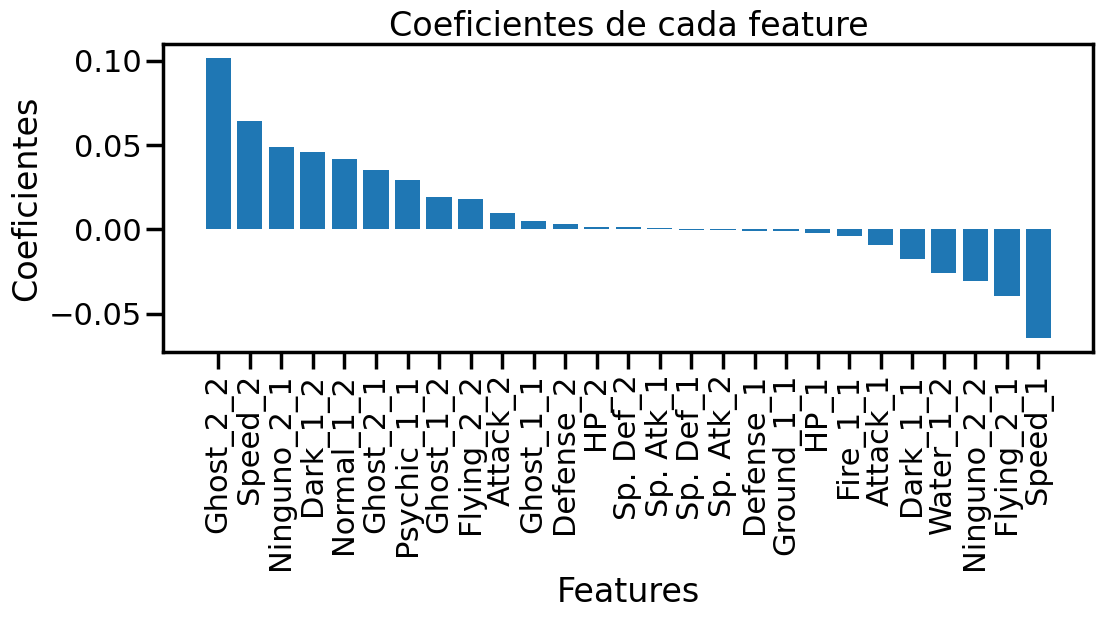

In [ ]:
plt.figure(figsize=(12,4))
plt.bar(filtered_coefs.keys(), filtered_coefs.values())
plt.xlabel("Features")
plt.ylabel("Coeficientes")
plt.title("Coeficientes de cada feature")
plt.xticks(rotation='vertical')
plt.show()